In [1]:
%load_ext autoreload
%autoreload 2

# Introduction to gradient descent

Useful links:

* https://playground.tensorflow.org
* https://www.geogebra.org/m/jmTFk4eg


### Setup


In [2]:
# If True, test is running on Colab. Otherwise, test if assumed to be offline.
TEST_ON_COLAB = False

FOLDERNAME = "Colab Notebooks/ann/2_intro-gradient-descent" # only used if TEST_ON_COLAB is True

assert not (FOLDERNAME is None and TEST_ON_COLAB), "FOLDERNAME has to be set if TEST_ON_COLAB is True"

Set a seed for reproducibility:

In [3]:
%pip install ipympl

Note: you may need to restart the kernel to use updated packages.


In [4]:
SEED = 42

In [5]:
import numpy as np

np.random.seed(SEED)

### A simple 1-D case

For $f(x) = x^2$, the derivative is $f'(x) = 2x$. The gradient descent update rule is:

$$x_{n+1} = x_n - \alpha f'(x_n)$$

where $\alpha$ is the learning rate.

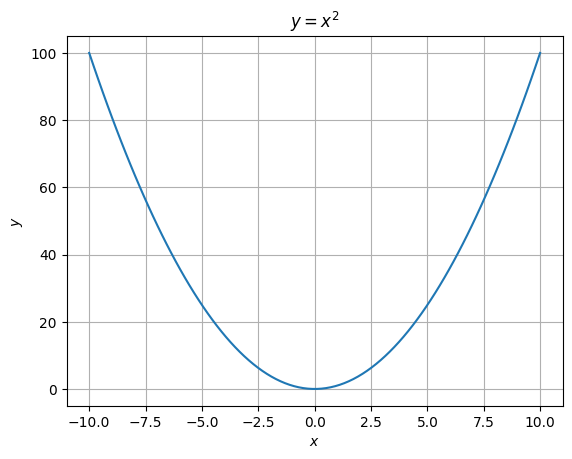

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = np.linspace(-10, 10, 100)
ax.plot(x, x**2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid()
plt.title('$y = x^2$')
plt.show()

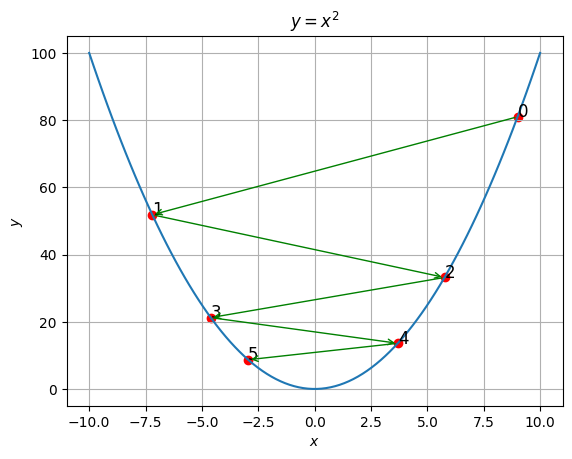

In [7]:
x0 = 9 # initial guess
grad = lambda x: 2 * x
learning_rate = 0.9 # step size (try with different values)
num_iterations = 5

# Gradient descent
x_history = [x0]
x_prev = x0
for i in range(num_iterations):
    x_curr = x_prev - learning_rate * grad(x_prev)
    x_history.append(x_curr)
    x_prev = x_curr

# Plot history
x_history = np.array(x_history)
plt.plot(x, x**2)
plt.scatter(x_history, x_history**2, color='red')
for i in range(len(x_history)):
    plt.text(x_history[i], x_history[i]**2, str(i), fontsize=12)

# arrows
for i in range(1, len(x_history)):
    plt.annotate('', xy=(x_history[i], x_history[i]**2), xytext=(x_history[i-1], x_history[i-1]**2),
                 arrowprops={'arrowstyle': '->', 'color': 'g', 'lw': 1},
                 va='center', ha='center')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.title('$y = x^2$')
plt.show()

### A more complex (2-D) case

For $f(x, y) = x^2 + 2y^2 + 3$, the gradient is $\nabla f = [2x, 4y]$. The gradient descent update rule is:

$$x_{n+1} = x_n - \alpha \frac{\partial f}{\partial x}$$
$$y_{n+1} = y_n - \alpha \frac{\partial f}{\partial y}$$


#### From derivatives to gradient

The gradient is a generalization of the derivative to multiple dimensions. The gradient of a function $f(\mathbf{x}) = f(x_1, x_2, \ldots, x_d)$ is the vector of partial derivatives:

$$\nabla f = \frac{\partial f}{\partial \mathbf{x}} = \left[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_d}\right].$$

Thus, for $f(\mathbf{x}) = f(x_1, x_2) = x_1^2 + 2x_2^2 + 3$, the gradient is $\nabla f = \left[\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right] = [2x, 4y]^T$, and the update rule is:

$$
\mathbf{x}_{n+1} = \mathbf{x}_n - \alpha \nabla f(\mathbf{x}_n).
$$


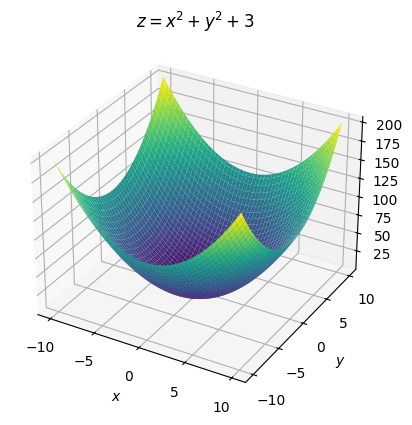

In [8]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 + 3

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.title('$z = x^2 + y^2 + 3$')
plt.show()

In [9]:
x0 = np.array([2, 9]) # initial guess
grad = lambda x: np.array([2 * x[0], 4 * x[1]])
learning_rate = 0.1 # step size (try with different values)

num_iterations = 5

# Gradient descent
x_history = [x0]
x_prev = x0
for i in range(num_iterations):
    x_curr = x_prev - learning_rate * grad(x_prev)
    x_history.append(x_curr)
    x_prev = x_curr
    print(x_curr)

[1.6 5.4]
[1.28 3.24]
[1.024 1.944]
[0.8192 1.1664]
[0.65536 0.69984]


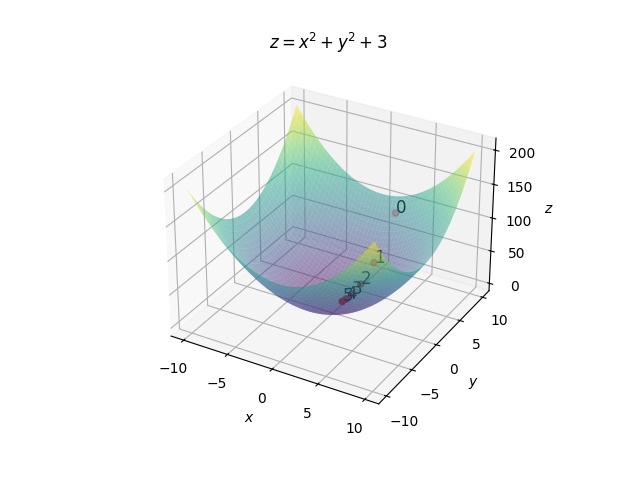

In [10]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot function
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.title('$z = x^2 + y^2 + 3$')

# Plot history
x_history = np.array(x_history)
ax.scatter(x_history[:, 0], x_history[:, 1], x_history[:, 0]**2 + x_history[:, 1]**2 + 3, color='red')
for i in range(len(x_history)):
    ax.text(x_history[i, 0], x_history[i, 1], x_history[i, 0]**2 + x_history[i, 1]**2 + 3, str(i), fontsize=12)

### Revisiting perceptron

For a sample $(\mathbf{x}_i, y_i)$, the perceptron criterion is:

$$L_i = \max(0, -y_i(\mathbf{w} \cdot \mathbf{x}_i)).$$

The gradient of the perceptron criterion is:

$$\nabla_w L_i = \begin{cases}
0 & \text{if } -y_i(\mathbf{w} \cdot \mathbf{x}_i) < 0 \\
-y_i \mathbf{x}_i & \text{otherwise}.
\end{cases}$$

#### Gradient deduction

For correct prediction, $L_i = 0$, therefore $\nabla_w L_i = 0$. For incorrect prediction, $L_i = -y_i(\mathbf{w} \cdot \mathbf{x}_i)$. Thus, 

$$
\begin{align*}
\nabla_w L_i & = \frac{\partial L_i}{\partial \mathbf{w}} \\
             & = \frac{\partial}{\partial \mathbf{w}} (-y_i (\mathbf{w} \cdot \mathbf{x}_i)) \\
            & = -y_i \frac{\partial}{\partial \mathbf{w}} (\mathbf{w} \cdot \mathbf{x}_i) \\
            & = -y_i \mathbf{x}_i.
\end{align*}
$$

The update rule for the perceptron criterion is:

$$
\begin{align*}
\mathbf{w}_{n+1} & = \mathbf{w}_n - \alpha \nabla_w L_i \\
                 & = \begin{cases}
                     \mathbf{w}_n & \text{if } -y_i(\mathbf{w} \cdot \mathbf{x}_i) < 0 \\
                     \mathbf{w}_n + \alpha y_i \mathbf{x}_i & \text{otherwise}.
                     \end{cases}
\end{align*}
$$





In [18]:
%matplotlib widget

x = np.array([2, 9, 1]) # 1 is the bias term
w = np.array([1, 1, 1]) # weights
y = -1 # label
y_pred = int(np.dot(w, x) > 0) # prediction
loss_fn = lambda x, y: max(0, -y * np.dot(w, x)) # perceptron loss function
# grad_fn = lambda x, y: -y * x if loss_fn(x, y) > 0 else 0 # perceptron gradient


L = loss_fn(x, y)
L

print(f"y={y}, y_pred={y_pred}, L={L}")
W = np.linspace(-10, 10, 100)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot function
ax.plot_surface(W, W, L, cmap='viridis', alpha=0.5)
# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
# ax.set_zlabel('$z$')
# plt.title('$z = x^2 + y^2 + 3$')



y=-1, y_pred=1, L=12


In [ ]:
num_epochs = 10
learning_rate = 0.0001

# Add a bias term
X_b = np.hstack([X, np.ones((X.shape[0], 1))])

# Random weights initialization
w = np.random.normal(size=X_b.shape[1])
print(f"w.shape: {w.shape}")

iteration = 0
loss_history = []
for epoch in range(num_epochs):
    for i in range(len(X_b)):
        y_pred = np.dot(X_b[i], w)

        # Loss
        loss_value = (y[i] - y_pred) ** 2
        loss_history.append(loss_value)

        # Print loss
        print(f"Iteration {iteration}: Loss {loss_value}")

        # Update weights
        w = w + learning_rate * (y[i] - y_pred) * X_b[i]

        iteration += 1

w.shape: (3,)
Iteration 0: Loss 116.73953950608282
Iteration 1: Loss 125.16342458628053
Iteration 2: Loss 106.27225459481954
Iteration 3: Loss 86.60755796471068
Iteration 4: Loss 72.08058444695115
Iteration 5: Loss 91.73358704716956
Iteration 6: Loss 165.89170407319025
Iteration 7: Loss 93.59514812106725
Iteration 8: Loss 76.5848586832372
Iteration 9: Loss 156.78611876382004
Iteration 10: Loss 138.2793107153422
Iteration 11: Loss 89.73035428124945
Iteration 12: Loss 74.30897044789864
Iteration 13: Loss 115.37814826287202
Iteration 14: Loss 77.46765746352216
Iteration 15: Loss 91.83632272365348
Iteration 16: Loss 110.32212013802075
Iteration 17: Loss 154.5879773254047
Iteration 18: Loss 107.09950545426808
Iteration 19: Loss 66.35518884960943
Iteration 20: Loss 111.66327785323573
Iteration 21: Loss 115.23999570527023
Iteration 22: Loss 97.06182035339019
Iteration 23: Loss 71.85849435156574
Iteration 24: Loss 82.70745844062165
Iteration 25: Loss 106.55922339406268
Iteration 26: Loss 60.11

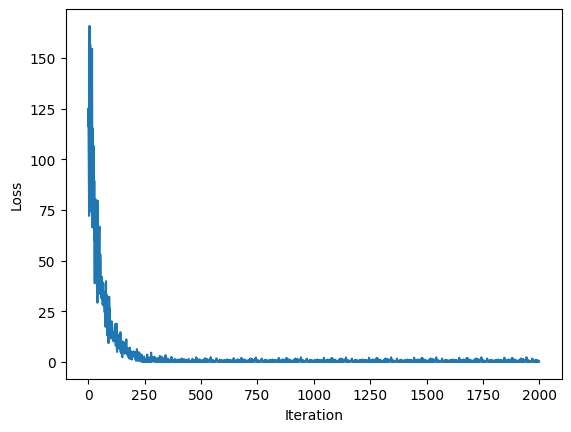

In [ ]:
plot_loss_history(loss_history)

-6.896722218754066 0.22816530330090146 20.29372392131021 -3.8860919310227384


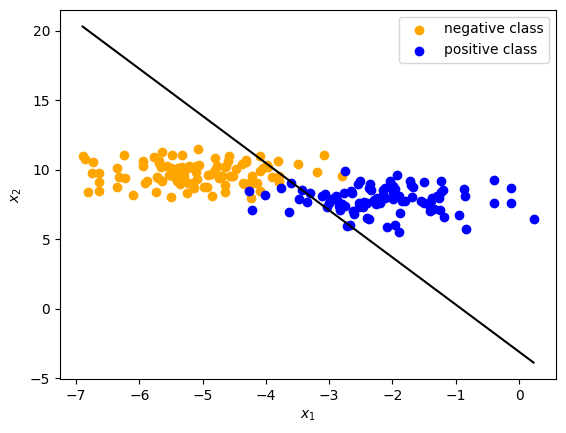

In [ ]:
plot_classification_dataset_2D(X, y, negative_label=-1)

x1_min = X_b[:, 0].min()
x1_max = X_b[:, 0].max()
x2_min = (-w[2] - w[0] * x1_min) / w[1]
x2_max = (-w[2] - w[0] * x1_max) / w[1]
print(x1_min, x1_max, x2_min, x2_max)
plt.plot([x1_min, x1_max], [x2_min, x2_max], color="black")  # decision boundary
plt.show()

### Sigmoid activation

The sigmoid function is defined as

$$
\phi(z) = \frac{1}{1 + e^{-z}}.
$$

For a training example $(\mathbf{x}, y)$, the output of the perceptron represents the probability of the class $y = 1$ given the input $\mathbf{x}$ and is given by

$$
\hat{y} = \frac{1}{1 + e^{-\mathbf{w} \cdot \mathbf{x}}}.
$$

#### Logistic regression

The Logistic Regression, used for binary classification, is the resulting model when the sigmoid activation function is used in the perceptron. The loss function is the cross-entropy loss:

$$
L = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})].
$$


Sigmoid activation

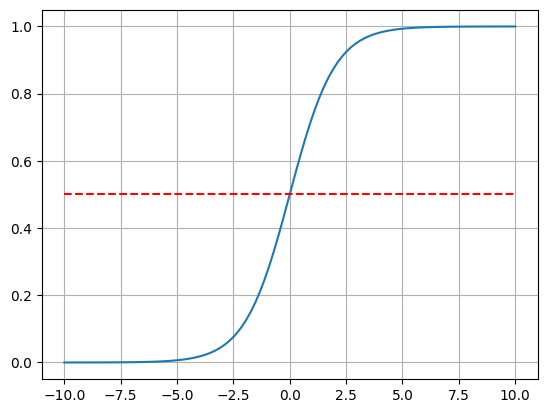

In [ ]:
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid)
plt.hlines(0.5, -10, 10, color='red', linestyle='--')
plt.grid()
plt.show()


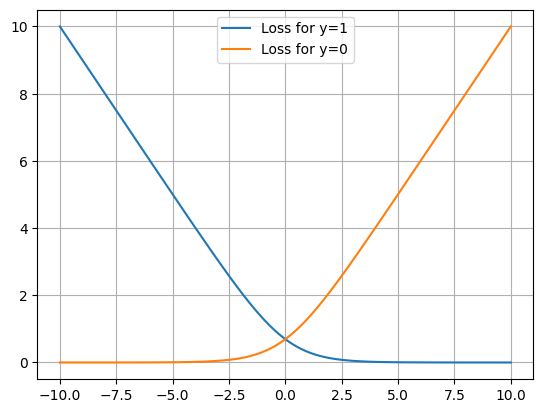

In [ ]:
loss_positive = -np.log(sigmoid)
loss_negative = -np.log(1 - sigmoid)
plt.plot(z, loss_positive, label="Loss for y=1")
plt.plot(z, loss_negative, label="Loss for y=0")
plt.grid()
plt.legend()
plt.show()


The gradient of the loss function with respect to the weights is:

$$
\begin{aligned}
\frac{\partial L}{\partial \mathbf{w}} & = -\left[ y \frac{1}{\hat{y}} - (1 - y) \frac{1}{1 - \hat{y}} \right] \frac{\partial \hat{y}}{\partial \mathbf{w}}\\
& = -\left[ y \frac{1}{\hat{y}} - (1 - y) \frac{1}{1 - \hat{y}} \right] \hat{y} (1 - \hat{y}) \mathbf{x}\\
& = -\left[ y (1 - \hat{y}) - (1 - y) \hat{y} \right] \mathbf{x}\\
& = -\left[ y - y \hat{y} - \hat{y} + y \hat{y} \right] \mathbf{x}\\
& = -\left[ y - \hat{y} \right] \mathbf{x}.
\end{aligned}


In [ ]:
num_epochs = 10
learning_rate = 0.001

# Random weights initialization
w = np.random.normal(size=X_b.shape[1])

iteration = 0
loss_history = []
for epoch in range(num_epochs):
    for i, x in enumerate(X_b):
        z = np.dot(x, w)
        y_pred = 1 if z > 0 else -1

        # Loss
        loss_value = max(0, -y[i] * z)
        loss_history.append(loss_value)

        # Print loss
        print(f"Iteration {iteration}: Loss {loss_value}")

        # Update weights
        w = w + learning_rate * (y[i] - y_pred) * x

        # # Alternatively, ....
        # if y[i] != y_pred:
        #     w = w + learning_rate * y[i] * x

        iteration += 1

Iteration 0: Loss 0.9693285318694361
Iteration 1: Loss 0.8545988269536527
Iteration 2: Loss 0.5137158781423407
Iteration 3: Loss 0.19802650688952983
Iteration 4: Loss 0.012859713737662815
Iteration 5: Loss 0.023090625871146297
Iteration 6: Loss 0
Iteration 7: Loss 0
Iteration 8: Loss 0
Iteration 9: Loss 0
Iteration 10: Loss 0
Iteration 11: Loss 0
Iteration 12: Loss 0.04160280685983209
Iteration 13: Loss 0
Iteration 14: Loss 0.022997224834605534
Iteration 15: Loss 0
Iteration 16: Loss 0.13529172478275464
Iteration 17: Loss 0
Iteration 18: Loss 0.0283297256496039
Iteration 19: Loss 0
Iteration 20: Loss 0
Iteration 21: Loss 0
Iteration 22: Loss 0
Iteration 23: Loss 0
Iteration 24: Loss 0.07253960505287627
Iteration 25: Loss 0
Iteration 26: Loss 0
Iteration 27: Loss 0.012563412900509663
Iteration 28: Loss 0
Iteration 29: Loss 0
Iteration 30: Loss 0.07438138763442248
Iteration 31: Loss 0
Iteration 32: Loss 0
Iteration 33: Loss 0.0439375917480459
Iteration 34: Loss 0
Iteration 35: Loss 0
Ite

Training curve:

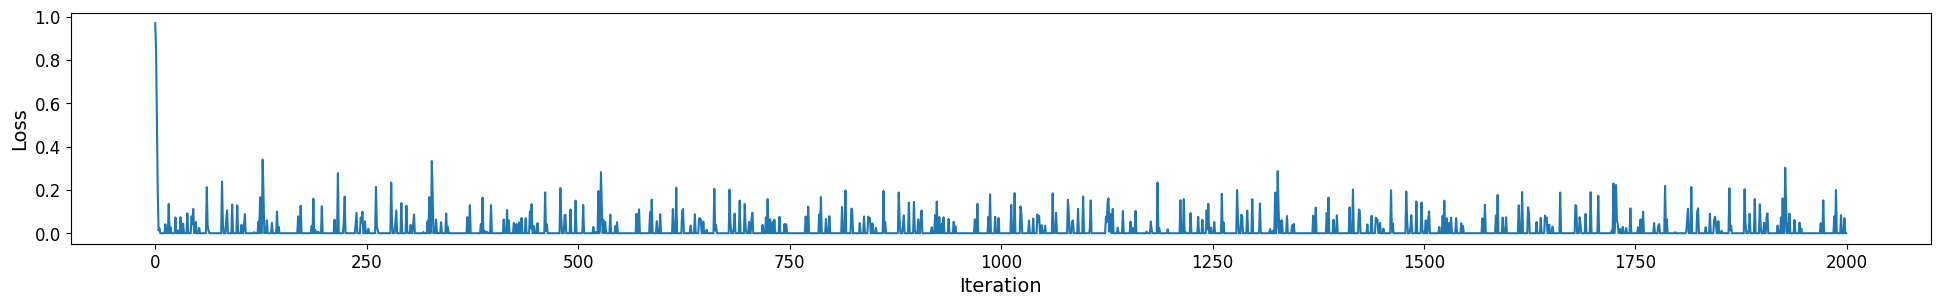

In [ ]:
fig, ax = plt.subplots(figsize=(24, 3))

plt.plot(loss_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Decision boundary:

-8.255233755363747 2.037620628568785 3.624289903684095 20.54303342382


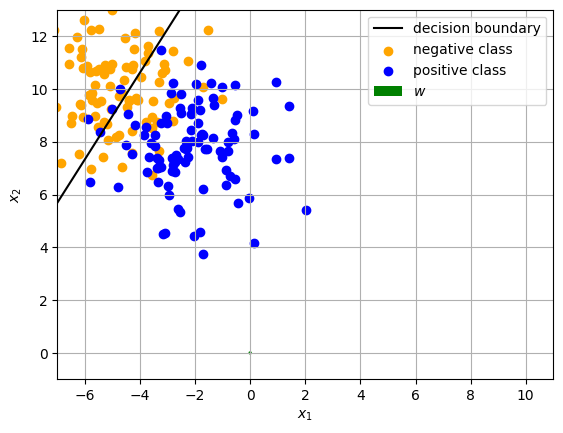

In [ ]:
# plot decision boundary
x1_min = X_b[:, 0].min()
x1_max = X_b[:, 0].max()
x2_min = (-w[2] - w[0] * x1_min) / w[1]
x2_max = (-w[2] - w[0] * x1_max) / w[1]

print(x1_min, x1_max, x2_min, x2_max)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="black")  # decision boundary
plt.scatter(X_b[y == -1][:, 0], X_b[y == -1][:, 1], color="orange")  # negative class
plt.scatter(X_b[y == 1][:, 0], X_b[y == 1][:, 1], color="blue")  # positive class
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.quiver(0, 0, w[0], w[1], scale=1, scale_units="xy", angles="xy", color="green")  # weight vector
plt.legend(["decision boundary", "negative class", "positive class", "$w$"])
plt.xlim(-7, 11)
plt.ylim(-1, 13)
# plt.axis("equal")
plt.grid(True)
plt.show()

#### Perceptron vs. Linear SVMs

Perceptron criterion:

$$ L_i = \max(0, -y_i(\mathbf{w} \cdot \mathbf{x}_i))$$

Linear SVM criterion:

$$ L_i = \max(0, 1 - y_i(\mathbf{w} \cdot \mathbf{x}_i))$$


In [ ]:
num_epochs = 10
learning_rate = 0.001

# Random weights initialization
w = np.random.normal(size=X_b.shape[1])

iteration = 0
loss_history = []
for epoch in range(num_epochs):
    for i, x in enumerate(X_b):
        z = np.dot(x, w)
        y_pred = 1 if z > 0 else -1

        # Loss
        loss_value = max(0, 1 - y[i] * z)
        loss_history.append(loss_value)

        # Print loss
        print(f"Iteration {iteration}: Loss {loss_value}")

        # Update weights
        if (1 - y[i] * z) > 0: # barely correct
            w = w + learning_rate * y[i] * x

        iteration += 1

Iteration 0: Loss 3.3292114579743046
Iteration 1: Loss 1.5544277995494036
Iteration 2: Loss 0.1705734797655728
Iteration 3: Loss 2.068742588363797
Iteration 4: Loss 0.18874076336300372
Iteration 5: Loss 1.8818648609525894
Iteration 6: Loss 5.357789998279781
Iteration 7: Loss 0
Iteration 8: Loss 2.8692322176411045
Iteration 9: Loss 6.2058727037856345
Iteration 10: Loss 1.8186825198398278
Iteration 11: Loss 0
Iteration 12: Loss 2.3175293768118013
Iteration 13: Loss 1.6606778991183366
Iteration 14: Loss 1.4997037501674129
Iteration 15: Loss 2.9798569923800873
Iteration 16: Loss 0
Iteration 17: Loss 5.189873986265257
Iteration 18: Loss 3.3155645937866
Iteration 19: Loss 4.029832363504025
Iteration 20: Loss 4.819149453205391
Iteration 21: Loss 2.8960594881264905
Iteration 22: Loss 6.135142747980063
Iteration 23: Loss 0.8867841587767313
Iteration 24: Loss 0.4492411089031142
Iteration 25: Loss 3.1465736822820536
Iteration 26: Loss 1.25637002227308
Iteration 27: Loss 1.9610260331482308
Iterati

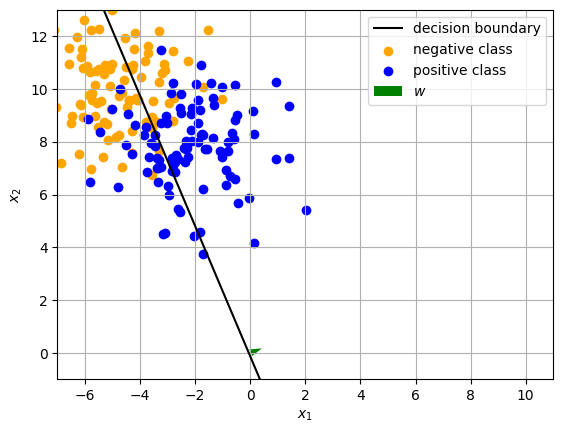

In [ ]:
# plot decision boundary
x1_min = X_b[:, 0].min()
x1_max = X_b[:, 0].max()
x2_min = (-w[2] - w[0] * x1_min) / w[1]
x2_max = (-w[2] - w[0] * x1_max) / w[1]

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="black")  # decision boundary
plt.scatter(X_b[y == -1][:, 0], X_b[y == -1][:, 1], color="orange")  # negative class
plt.scatter(X_b[y == 1][:, 0], X_b[y == 1][:, 1], color="blue")  # positive class
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.quiver(0, 0, w[0], w[1], scale=1, scale_units="xy", angles="xy", color="green") # weight vector
plt.legend(["decision boundary", "negative class", "positive class", "$w$"])
plt.xlim(-7, 11)
plt.ylim(-1, 13)
# plt.axis("equal")
plt.grid(True)
plt.show()

## Case study: SPAM detection

In [ ]:
# Create dataset directory

import os

if TEST_ON_COLAB:
    # This mounts your Google Drive to the Colab VM.
    from google.colab import drive

    drive.mount('/content/drive')
    cache_dir = f"/content/drive/My Drive/{FOLDERNAME}/dataset/{DATASET_OPENML_ID}"
else:
    cache_dir =  f"dataset/{DATASET_OPENML_ID}"

os.makedirs(cache_dir, exist_ok=True)

Fetching the SPAMBASE dataset.

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

X_file_path = f"{cache_dir}/X.npy"
y_file_path = f"{cache_dir}/y.npy"

# Check if the dataset files already exist
if not (os.path.exists(X_file_path) and os.path.exists(y_file_path)):
    # Download the SPAMBASE dataset
    X, y = fetch_openml(DATASET_OPENML_ID, as_frame=False, cache=True, return_X_y=True)
    
    # Save the dataset as numpy arrays
    np.save(X_file_path, X.astype(np.float32))
    np.save(y_file_path, y.astype(np.float32))
    print(f"SPAMBASE dataset downloaded and saved successfully to {cache_dir}.")
else:
    X = np.load(X_file_path, allow_pickle=True)
    y = np.load(y_file_path, allow_pickle=True)
    print(f"SPAMBASE dataset already exists in {cache_dir}. Skipping download.")

print(X.shape)
print(X.min(), X.max())

SPAMBASE dataset already exists in dataset/spambase. Skipping download.
(4601, 57)
0.0 15841.0


Splitting the dataset into training, validation and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
np.random.seed(SEED)

# Split the data into train and test sets
y[y==0] = -1 # convert 0 labels to -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Train set size: 3680
Test set size: 921


#### Implementation of a class Perceptron

In [ ]:
class Perceptron:
    def __init__(self, num_epochs=10, learning_rate=1e-03, include_bias=True):
        """ Initialize the perceptron model.
        
        Args:
            num_epochs (int): Number of epochs to train the model.
        """
        self.num_epochs = num_epochs
        self.learning_rate = learning_rate
        self.w = None
        self.include_bias = include_bias

    def fit(self, X, y):
        """ Fit the perceptron model.
        
        Args:
            X (ndarray): Input data of shape (num_samples, num_features).
            y (ndarray): Target labels of shape (num_samples,).
        """
        
        # Add bias term
        if self.include_bias:
            X = np.hstack([X, np.ones((X.shape[0], 1))])
        
        # Random weights initialization
        self.w = np.random.normal(size=X.shape[1])

        for epoch in range(self.num_epochs):
            for i, x in enumerate(X):
                z = np.dot(x, self.w)
                y_pred = 1 if z > 0 else -1
                self.w = self.w + self.learning_rate * (y[i] - y_pred) * x
        
        return self
    
    def predict(self, X):
        """ Predict the target labels.
        
        Args:
            X (ndarray): Input data of shape (num_samples, num_features).
        
        Returns:
            ndarray: Predicted target labels of shape (num_samples,).
        """
        
        if self.include_bias:
            X = np.hstack([X, np.ones((X.shape[0], 1))])
        
        return np.array([1 if np.dot(x, self.w) > 0 else -1 for x in X])

#### Training the Perceptron

In [ ]:
model = Perceptron(num_epochs=50, learning_rate=1e-02)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Classification report

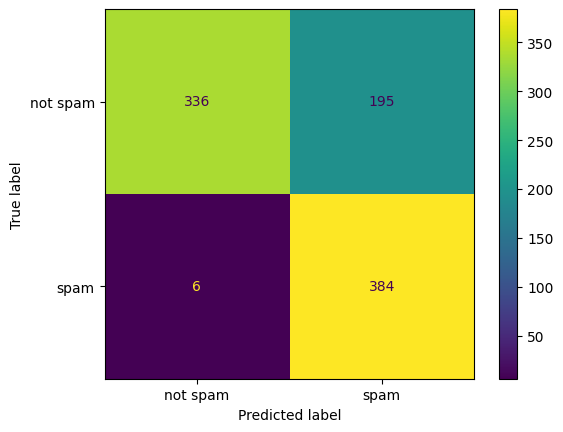


Classification Report:
              precision    recall  f1-score   support

    not spam       0.98      0.63      0.77       531
        spam       0.66      0.98      0.79       390

    accuracy                           0.78       921
   macro avg       0.82      0.81      0.78       921
weighted avg       0.85      0.78      0.78       921



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[-1, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["not spam", "spam"])
disp.plot()
plt.show()

# Compute classification report
class_report = classification_report(y_test, y_pred, target_names=["not spam", "spam"])

print("\nClassification Report:")
print(class_report)